In [1]:
data_path="./data"

In [2]:
import os
data=spark.read.csv(os.path.join(data_path, "smiley/smiley.csv"), header=True, sep=";")

NameError: name 'spark' is not defined

In this hands-on exercise we will be looking at data from the Danish Veterinary and Food Administration's "smiley"-data. This dataset contains a record for every company in Denmark that handles food. 

SparkSQL follows the Hive SQL syntax. Documentation of this can be found here: https://cwiki.apache.org/confluence/display/Hive/LanguageManual+Select

There are two different ways of writing queries with SparkSQL

In [26]:
data.show()

+---------+--------+----------+-----------+--------------------+---------------+--------------------+--------------------+------+----------------+---------------+--------------------+--------------------+-------------------------+---------------------+--------------------------+---------------------+--------------------------+--------------------+-------------------+------------+---------+---------+
|navnelbnr|   cvrnr|       pnr|brancheKode|             branche|virksomhedstype|               navn1|            adresse1|postnr|              By|seneste_kontrol|seneste_kontrol_dato|naestseneste_kontrol|naestseneste_kontrol_dato|tredjeseneste_kontrol|tredjeseneste_kontrol_dato|fjerdeseneste_kontrol|fjerdeseneste_kontrol_dato|                 URL|reklame_beskyttelse|Elite_Smiley|  Geo_Lng|  Geo_Lat|
+---------+--------+----------+-----------+--------------------+---------------+--------------------+--------------------+------+----------------+---------------+--------------------+-----------

In [27]:
data.registerTempTable("smiley")
spark.sql("SELECT seneste_kontrol, Elite_Smiley FROM smiley").take(40)

[Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='1'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='1'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='1'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='1'),
 Row(seneste_kontrol='1', Elite_Smiley='1'),
 Row(seneste_kontrol='2', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(seneste_kontrol='1', Elite_Smiley='1'),
 Row(seneste_kontrol='1', Elite_Smiley='1'),
 Row(seneste_kontrol='1', Elite_Smiley='0'),
 Row(senes

In [30]:
spark.sql("SELECT seneste_kontrol, COUNT(*) FROM smiley GROUP BY seneste_kontrol").show()

+---------------+--------+
|seneste_kontrol|count(1)|
+---------------+--------+
|              3|      38|
|              0|       1|
|           null|    7061|
|              1|   52650|
|              4|     188|
|              2|    1179|
+---------------+--------+



In [31]:
spark.sql("SELECT seneste_kontrol, COUNT(*) FROM smiley WHERE seneste_kontrol>0 GROUP BY seneste_kontrol").show()

+---------------+--------+
|seneste_kontrol|count(1)|
+---------------+--------+
|              3|      38|
|              1|   52650|
|              4|     188|
|              2|    1179|
+---------------+--------+



In [36]:
d=spark.sql("SELECT seneste_kontrol, COUNT(*) FROM smiley WHERE seneste_kontrol>0 GROUP BY seneste_kontrol")
#d.collect().map(lambda x: (x["seneste_kontrol"], x["count(1)"]))

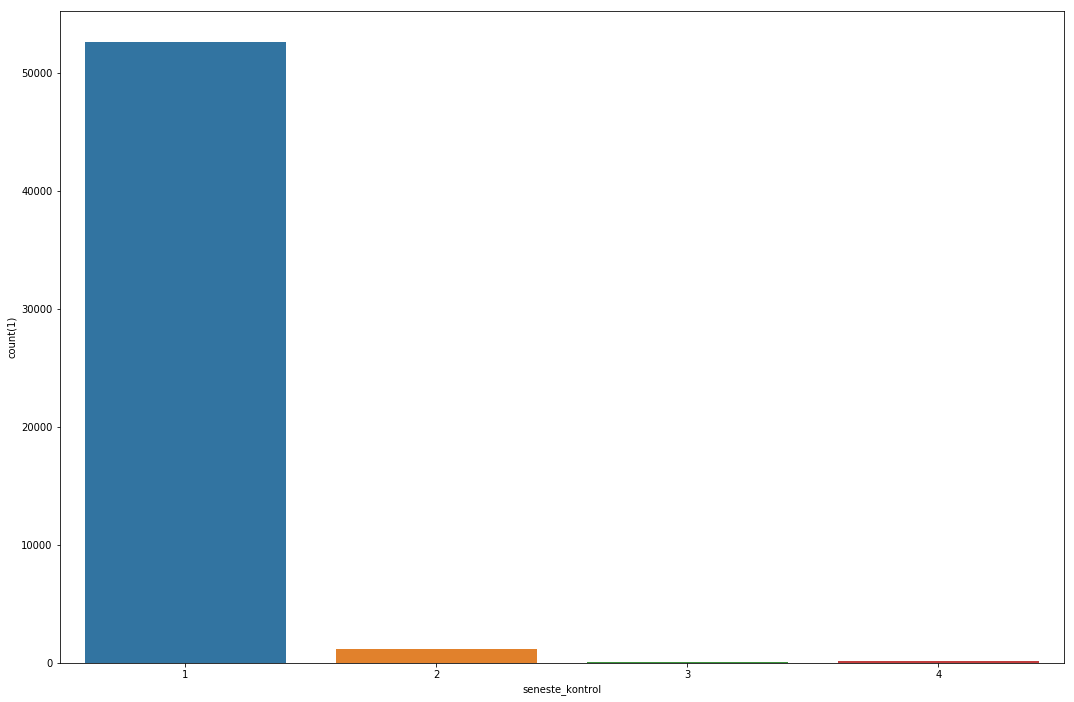

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
ax = sns.barplot(x="seneste_kontrol", y="count(1)", data=d.toPandas())

In [58]:
elite=spark.sql("""SELECT Elite_Smiley,
          SUM( CASE WHEN branche LIKE '%Bager%' THEN 1 ELSE 0 END ) AS BAGER,
          SUM( CASE WHEN branche LIKE '%Slagter%' THEN 1 ELSE 0 END ) AS SLAGTER
          FROM smiley 
          WHERE Elite_Smiley IS NOT NULL
          GROUP BY Elite_Smiley
          """)
elite.toPandas()

,Elite_Smiley,BAGER,SLAGTER
0,0,550,390
1,1,607,893


In [62]:
elite=spark.sql("""SELECT Elite_Smiley, branche, COUNT(*)
          FROM smiley 
          WHERE Elite_Smiley IS NOT NULL
          AND ()
          GROUP BY Elite_Smiley, branche
          """)
elite.toPandas()

,Elite_Smiley,branche,count(1)
0,1,Fremstilling af animalske produkter - Mælk og ost,79
1,1,Fremstilling af drikkevarer m.v.,122
2,0,Catering med levering til detailvirksomheder (...,36
3,0,"Markedsføring af fødevarekontaktmaterialer, de...",65
4,0,"Transportvirksomhed, engros",1043
5,1,"Fremstilling af fødevarekontaktmaterialer, detail",2
6,1,"Fremstilling af kosttilskud, tilsætningsstoffe...",79
7,1,"Virksomhed, foreløbig: Engroshandel og/eller l...",2
8,0,Midlertidig ejerskifte-branche,7
9,0,Serveringsvirksomhed - Institutionskøkkener m.v.,2420


In [60]:
ax = sns.barplot(x="Elite_Smiley", y="BAGER", data=elite.toPandas())

ValueError: Could not interpret input 'BAGER, SLAGTER'

Plot overall distribution

Plot bager vs fiskeforretning

